In [17]:
!pip install plotly --upgrade

In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jeongmin22","key":"977cb7cf72b827c224f2a621dbe93cbb"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d vidyapb/indian-school-education-statistics

  0% 0.00/23.5k [00:00<?, ?B/s]
100% 23.5k/23.5k [00:00<00:00, 12.1MB/s]


In [3]:
path_to_zip_file = '/content/indian-school-education-statistics.zip'
directory_to_extract_to = '/content'

import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

import os
os.listdir(directory_to_extract_to)

['.config',
 'kaggle.json',
 'percentage-of-schools-with-comps-2013-2016.csv',
 'percentage-of-schools-with-electricity-2013-2016.csv',
 'dropout-ratio-2012-2015.csv',
 'gross-enrollment-ratio-2013-2016.csv',
 'schools-with-boys-toilet-2013-2016.csv',
 'indian-school-education-statistics.zip',
 'percentage-of-schools-with-water-facility-2013-2016.csv',
 'schools-with-girls-toilet-2013-2016.csv',
 'sample_data']

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('/content/dropout-ratio-2012-2015.csv')
df1.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


# West Bengal주의 학교 중퇴 분석

In [5]:
data_wb=df1[df1['State_UT']=='West Bengal']
print(data_wb.head())

        State_UT     year  ... HrSecondary_Girls HrSecondary_Total
104  West Bengal  2012-13  ...              8.49              8.13
105  West Bengal  2013-14  ...              7.76               7.9
106  West Bengal  2014-15  ...              8.04              8.11

[3 rows x 14 columns]


In [6]:
data_wb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 104 to 106
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State_UT             3 non-null      object
 1   year                 3 non-null      object
 2   Primary_Boys         3 non-null      object
 3   Primary_Girls        3 non-null      object
 4   Primary_Total        3 non-null      object
 5   Upper Primary_Boys   3 non-null      object
 6   Upper Primary_Girls  3 non-null      object
 7   Upper Primary_Total  3 non-null      object
 8   Secondary _Boys      3 non-null      object
 9   Secondary _Girls     3 non-null      object
 10  Secondary _Total     3 non-null      object
 11  HrSecondary_Boys     3 non-null      object
 12  HrSecondary_Girls    3 non-null      object
 13  HrSecondary_Total    3 non-null      object
dtypes: object(14)
memory usage: 360.0+ bytes


In [7]:
primary_boys=data_wb['Primary_Boys'].values.astype(np.float32);
primary_girls=data_wb['Primary_Girls'].values.astype(np.float32);

upper_primary_boys=data_wb['Upper Primary_Boys'].values.astype(np.float32);
upper_primary_girls=data_wb['Upper Primary_Girls'].values.astype(np.float32);

secondary_boys=data_wb['Secondary _Boys'].values.astype(np.float32);
secondary_girls=data_wb['Secondary _Girls'].values.astype(np.float32);

higher_secondary_boys=data_wb['HrSecondary_Boys'].values.astype(np.float32);
higher_secondary_girls=data_wb['HrSecondary_Girls'].values.astype(np.float32);

In [8]:
years=data_wb['year'].values;
print(years)

years_ind=[1,2,3]

['2012-13' '2013-14' '2014-15']


* 연도별 학생 그룹 시각화

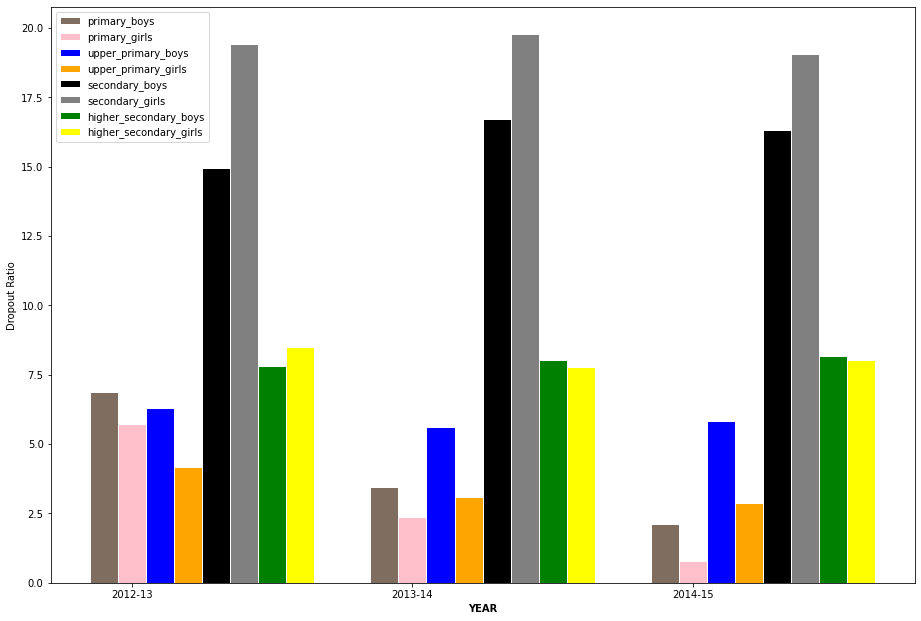

In [9]:
# set width of bar
barWidth = 0.10

#set figure
fig=plt.figure()
ax=fig.add_axes([5,5,2,2])

# set height of bar
bars1 = primary_boys
bars2 = primary_girls
bars3 = upper_primary_boys
bars4 = upper_primary_girls
bars5 = secondary_boys
bars6 = secondary_girls
bars7 = higher_secondary_boys
bars8 = higher_secondary_girls
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
 
# Make the plot
ax.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='primary_boys')
ax.bar(r2, bars2, color='pink', width=barWidth, edgecolor='white', label='primary_girls')
ax.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='upper_primary_boys')
ax.bar(r4, bars4, color='orange', width=barWidth, edgecolor='white', label='upper_primary_girls')
ax.bar(r5, bars5, color='black', width=barWidth, edgecolor='white', label='secondary_boys')
ax.bar(r6, bars6, color='grey', width=barWidth, edgecolor='white', label='secondary_girls')
ax.bar(r7, bars7, color='green', width=barWidth, edgecolor='white', label='higher_secondary_boys')
ax.bar(r8, bars8, color='yellow', width=barWidth, edgecolor='white', label='higher_secondary_girls')

# Add xticks on the middle of the group bars
plt.xlabel('YEAR', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], years)

plt.ylabel('Dropout Ratio')
 
# Create legend & Show graphic
plt.legend()
plt.show()

> 중등부 학생들이 다른 학생들에 비해 중퇴률이 가장 높은 것을 알 수 있다. 

* 총 등록 통계

In [10]:
import matplotlib.pyplot as plt

df2 = pd.read_csv('/content/gross-enrollment-ratio-2013-2016.csv')
print(df2.head())

                    State_UT  ... Higher_Secondary_Total
0  Andaman & Nicobar Islands  ...                 101.28
1             Andhra Pradesh  ...                   60.3
2          Arunachal Pradesh  ...                  65.27
3                      Assam  ...                  32.94
4                      Bihar  ...                   23.7

[5 rows x 14 columns]


In [11]:
data_wb=df2[df2['State_UT']=='West Bengal']
print(data_wb.head())

        State_UT     Year  ...  Higher_Secondary_Girls  Higher_Secondary_Total
34   West Bengal  2013-14  ...                   48.96                   48.13
71   West Bengal  2015-16  ...                   54.36                   51.54
108  West Bengal  2014-15  ...                   51.82                   49.95

[3 rows x 14 columns]


In [12]:
data_wb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 34 to 108
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_UT                3 non-null      object 
 1   Year                    3 non-null      object 
 2   Primary_Boys            3 non-null      float64
 3   Primary_Girls           3 non-null      float64
 4   Primary_Total           3 non-null      float64
 5   Upper_Primary_Boys      3 non-null      float64
 6   Upper_Primary_Girls     3 non-null      float64
 7   Upper_Primary_Total     3 non-null      float64
 8   Secondary_Boys          3 non-null      float64
 9   Secondary_Girls         3 non-null      float64
 10  Secondary_Total         3 non-null      float64
 11  Higher_Secondary_Boys   3 non-null      object 
 12  Higher_Secondary_Girls  3 non-null      object 
 13  Higher_Secondary_Total  3 non-null      object 
dtypes: float64(9), object(5)
memory usage: 360.

In [13]:
data_wb['Primary_Boys']=data_wb['Primary_Boys'].values.astype(np.float32);
data_wb['Primary_Girls']=data_wb['Primary_Girls'].values.astype(np.float32);

data_wb['Upper_Primary_Boys']=data_wb['Upper_Primary_Boys'].values.astype(np.float32);
data_wb['Upper_Primary_Girls']=data_wb['Upper_Primary_Girls'].values.astype(np.float32);

data_wb['Secondary_Boys']=data_wb['Secondary_Boys'].values.astype(np.float32);
data_wb['Secondary_Girls']=data_wb['Secondary_Girls'].values.astype(np.float32);

data_wb['Higher_Secondary_Boys']=data_wb['Higher_Secondary_Boys'].values.astype(np.float32);
data_wb['Higher_Secondary_Girls']=data_wb['Higher_Secondary_Girls'].values.astype(np.float32);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [14]:
!pip install plotly --upgrade

     |████████████████████████████████| 23.9 MB 14 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [15]:
import plotly.express as px
fig = px.bar(data_wb, x="Year", y=["Primary_Boys","Primary_Girls", "Upper_Primary_Boys","Upper_Primary_Girls" ,"Secondary_Boys","Secondary_Girls", "Higher_Secondary_Boys","Higher_Secondary_Girls"], title="연도별 전체 등록 수")
fig.show()

- 이 차트에서 우리는 수년 동안 West Bengal 학교에서 Upper_Primary_Girls 등록이 가장 많은 것을 확인할 수 있습니다. 
- 또한, 고등 중등 학교 범주에서 총 등록 수가 가장 낮다는 것입니다. 
    - 아마도 많은 학생들이 다른 주의 더 나은 학교로 전학을 하였기 때문일 수 있습니다.

* 백분율 변화에 대한 분석 - 위의 결과를 바탕으로 이제 특정 연도의 모든 주에 대한 총 등록률 변화율을 분석
* 백분율 변화는 Secondary_Total 열 및 Higher_Secondary_Total 열에서 값을 가져와 계산됩니다. 
대부분의 주에서 총 등록이 감소했기 때문에 대부분의 경우 음수입니다.

In [16]:
df4=df2[df2.columns[[0,1,10,13]]]
df4

,State_UT,Year,Secondary_Total,Higher_Secondary_Total
0,Andaman & Nicobar Islands,2013-14,100.16,101.28
1,Andhra Pradesh,2013-14,75.20,60.3
2,Arunachal Pradesh,2013-14,86.65,65.27
3,Assam,2013-14,71.21,32.94
4,Bihar,2013-14,60.08,23.7
...,...,...,...,...
105,Tripura,2014-15,120.57,43.4
106,Uttar Pradesh,2014-15,67.79,63.75
107,Uttaranchal,2014-15,90.35,80.36
108,West Bengal,2014-15,78.17,49.95


In [17]:
df4['Secondary_Total'].unique()

array([100.16,  75.2 ,  86.65,  71.21,  60.08,  92.11,  97.99,  83.66,
        73.88, 102.4 , 106.66,  74.5 ,  86.21, 120.31,  65.97,  70.14,
        77.49, 102.51, 127.61,  83.35,  85.58,  84.3 ,  72.8 , 106.62,
        68.24,  74.79, 101.01,  86.39,  78.68,  98.37,  92.5 , 117.01,
        66.18,  88.18,  74.82,  76.64,  86.69,  75.51,  89.63,  77.59,
        78.37,  87.19,  91.93,  88.57,  72.97, 106.81, 104.16,  74.13,
        84.22, 107.08,  66.81,  73.65,  83.22, 102.44, 103.66,  80.49,
        89.95,  93.07,  87.27, 109.02,  71.62,  79.61,  88.95,  87.06,
        76.06, 119.78,  93.92,  82.53, 118.49,  67.75,  85.72,  83.56,
        80.01,  92.88,  72.4 ,  91.62,  74.78,  69.09,  89.69, 101.82,
        88.07,  74.85, 103.56, 113.63,  74.34,  84.25, 115.87,  66.29,
        71.86,  81.8 , 103.24, 123.01,  80.18,  89.31,  90.62,  81.05,
       108.15,  64.53,  77.06,  95.66,  85.59,  76.16, 111.26,  91.89,
        82.25, 120.57,  67.79,  90.35,  78.17,  78.51])

In [18]:
# 'NR' , '@'의 이상치 파악
df4['Higher_Secondary_Total'].unique()

array(['101.28', '60.3', '65.27', '32.94', '23.7', '91.49', '57.23',
       '39.64', '44.36', '100.42', '70.24', '48.51', '69.55', '96.13',
       '51.33', '43.96', '18.39', '87.58', '94.66', '44.76', '58.77',
       '62.18', '22.94', '59.88', '32.98', 'NR', '73.5', '71.79', '53.03',
       '62.62', '75.87', '40.99', '61.27', '76.31', '48.13', '52.21',
       '74.62', '60.16', '61.81', '38.81', '35.62', '83.28', '54',
       '48.49', '21.54', '77.9', '75.84', '43.43', '59.59', '95.53',
       '58.6', '48.32', '39.86', '77.56', '98.16', '45.25', '67.81',
       '67.95', '43.35', '55.68', '36.43', '36.54', '74.8', '70.19',
       '59.31', '68.23', '82.03', '61.32', '43.46', '60.78', '75.83',
       '51.54', '56.16', '95.65', '51.63', '68.71', '33.97', '31.79',
       '90.57', '63.34', '37.7', '37.48', '91.63', '77.88', '44.93',
       '65.78', '100.58', '59.33', '48.69', '32.96', '76.87', '85.99',
       '45.48', '62.2', '65.39', '36.03', '62.11', '33.61', '@', '70.87',
       '69.39', '

In [19]:
# 이상치 제거
df4=df4.replace('NR',0)
df4=df4.replace('@',0)

In [20]:
df4['Secondary_Total']=df4['Secondary_Total'].values.astype(np.float32);
df4['Higher_Secondary_Total']=df4['Higher_Secondary_Total'].values.astype(np.float32);


sec_total=df4["Secondary_Total"].values
high_sec_total=df4["Higher_Secondary_Total"].values

In [21]:
per_change=np.divide((high_sec_total-sec_total),sec_total)

print(per_change)
print(len(per_change))
print(len(df4))

df4['percentage_change']=per_change

print(df4.head())

[ 0.01118206 -0.19813828 -0.2467398  -0.5374245  -0.605526   -0.00673111
 -0.41596082 -0.5261774  -0.39956683 -0.01933597 -0.3414589  -0.34885907
 -0.193249   -0.20098081 -0.22191904 -0.3732535  -0.76267904 -0.14564432
 -0.25820857 -0.46298742 -0.31327415 -0.26239622 -0.6848901  -0.4383793
 -0.51670575 -1.         -0.2723493  -0.16900103 -0.3260041  -0.36342382
 -0.17978376 -0.64968807 -0.07419159 -0.13461106 -0.35672277 -0.31876305
 -0.13923174 -0.20328435 -0.3103871  -0.49980664 -0.5454894  -0.04484463
 -0.41259655 -0.4525234  -0.7048102  -0.27066752 -0.27188945 -0.4141373
 -0.29244837 -0.10786331 -0.12288579 -0.343924   -0.5210286  -0.24287392
 -0.05305807 -0.43781835 -0.24613674 -0.2699044  -0.50326574 -0.489268
 -0.49134323 -0.5410124  -0.15907808 -0.19377436 -0.22022083 -0.43037233
 -0.1265971  -0.25699744 -0.633218   -0.10287825 -0.11537563 -0.38319767
 -0.29808775  0.02982347 -0.28687847 -0.2500546  -0.5457341  -0.5398755
  0.00981154 -0.37792182 -0.5719314  -0.4992652  -0.1151

In [22]:
# Percentage change Visualization for the year 2013-14 for all states
import plotly.express as px
df4_1=df4[df4["Year"]=='2013-14']
fig = px.bar(df4_1, x='State_UT', y='percentage_change')
fig.show()

In [23]:
# Percentage change Visualization for the year 2014-15 for all states
import plotly.express as px
df4_2=df4[df4["Year"]=='2014-15']
fig = px.bar(df4_2, x='State_UT', y='percentage_change')
fig.show()

In [24]:
# Percentage change Visualization for the year 2015-16 for all states
import plotly.express as px
df4_3=df4[df4["Year"]=='2015-16']
fig = px.bar(df4_3, x='State_UT', y='percentage_change')
fig.show()

In [25]:
# 이상치가 기재되어 Hight_Seconday_Total 값을 0으로 대체한 지역
df4[df4['Higher_Secondary_Total']==0]

,State_UT,Year,Secondary_Total,Higher_Secondary_Total,percentage_change
25,Odisha,2013-14,74.790001,0.0,-1.0
98,Odisha,2014-15,77.059998,0.0,-1.0


* Odisha의 값이 올바르지 않으므로 2013-14 및 2014-15에는 비정상적인 값이 표시됩니다.
* 수년 동안 Tripura의 총 등록 감소 추세는 변하지 않았습니다.